#Practica 1: Regresión Lineal

## Alumno: Cano Portugal Israel Daniel Arturo
## Profesor: Jiménez Alcantar Daniel
## Grupo: 5AV1
## Materia: Aprendizaje a Maquina e Inteligencia Artificial



## Introduccion
La regresión lineal es un método estadístico y de machine learning utilizado para modelar la relación entre una variable dependiente (también llamada variable de respuesta o target) y una o más variables independientes (predictores o features). El objetivo principal es predecir valores continuos de la variable dependiente basados en los predictores, asumiendo que existe una relación lineal entre ellos.

Fórmula Básica: En su forma simple (regresión lineal univariada), se representa como:
$$y = \beta_0 + \beta_1 x + \epsilon$$
Donde:

* $ y $: Variable dependiente (lo que queremos predecir).
* $ x $: Variable independiente.
* $ \beta_0 $: Intersección (bias).
* $ \beta_1 $: Pendiente (coeficiente que indica la fuerza y dirección de la relación).
* $ \epsilon $: Término de error (residuos aleatorios).



En la regresión lineal múltiple, se extiende a múltiples variables independientes:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$$
Este modelo se entrena minimizando el error cuadrático medio (MSE) mediante técnicas como el método de los mínimos cuadrados ordinarios (OLS) o gradiente descendente. Es ampliamente usado en escenarios como predicción de precios, estimación de ventas o análisis de tendencias.

Ventajas: Simple de implementar, interpretable y eficiente computacionalmente.

Limitaciones: Asume linealidad, independencia de errores y homocedasticidad (varianza constante de errores). No maneja bien datos no lineales o outliers sin preprocesamiento.
Aplicaciones Reales: En finanzas (predicción de precios de acciones), marketing (estimación de ROI) o salud (predicción de peso basado en altura y edad).


## Problematica
Se debe automatizar y recoletar un dataset a partir de los tickets de ventas de productos, asegurándose de que los datos estén correctamente preprocesados y estructurados para poder integrarlos en un modelo de aprendizaje automático de regresión lineal.

## Metodologia

Para esta práctica, se adopta una metodología de ciencia de datos basada en el marco CRISP-DM (Cross-Industry Standard Process for Data Mining). CRISP-DM proporciona un proceso iterativo y estructurado, dividido en seis fases principales: Comprensión del Negocio, Comprensión de los Datos, Preparación de los Datos, Modelado, Evaluación y Despliegue. Esta metodología se adapta específicamente a la práctica, enfocándose en las fases relevantes para la extracción de datos no estructurados (PDFs) y su preparación para modelado predictivo. El proceso es iterativo, permitiendo retroalimentación entre fases para refinar resultados.

Se utilizan herramientas de programación en Python para garantizar reproducibilidad, eficiencia y escalabilidad. A continuación, se detalla cada fase adaptada al contexto de la práctica.

### **1. Comprensión del Negocio (Business Understanding)**

El desafío de esta práctica se centra en la transformación de datos no estructurados, provenientes de tickets de venta en formato PDF, en información valiosa para la toma de decisiones empresariales. La meta es predecir variables continuas, como el valor total de una venta, basándose en atributos extraídos de estos tickets. Para ello, se empleará la regresión lineal como una herramienta de Machine Learning que permita modelar y comprender las relaciones entre las variables.

**Problema del Negocio:**
La empresa necesita automatizar el análisis de sus ventas. Los datos están dispersos en tickets de venta en formato PDF, lo que impide un análisis ágil y la identificación de patrones clave. Esto obstaculiza la capacidad de la empresa para pronosticar ingresos, optimizar precios y entender el impacto de los diferentes factores de venta.

**Objetivos:**
* **Crear un Dataset Estructurado:** Generar un dataset limpio y unificado a partir de los tickets en PDF, asegurando que los datos estén listos para el análisis y el modelado predictivo.
* **Construir un Modelo Predictivo:** Desarrollar un modelo de regresión lineal capaz de predecir con precisión el total de la venta de un ticket basándose en la cantidad y el tipo de productos, así como el método de pago.
* **Identificar Factores Clave de Ingresos:** Analizar los coeficientes del modelo para identificar qué variables (por ejemplo, tipos de productos, descuentos, etc.) tienen el mayor impacto en el total de la venta.

**Criterios de Éxito:**
* **Calidad del Dataset:** El dataset final debe tener menos del 5% de valores faltantes y una estructura que facilite la ingesta en un modelo de Machine Learning.
* **Rendimiento del Modelo:** El modelo de regresión lineal debe alcanzar un $R^2$ ajustado superior a 0.85 en el conjunto de datos de prueba, con un Error Absoluto Medio (MAE) que demuestre que el modelo tiene la capacidad de hacer predicciones precisas.
* **Interpretación:** Los coeficientes del modelo deben ser interpretables y proporcionar información clara sobre las relaciones entre los predictores y la variable objetivo, permitiendo una fácil comunicación de los hallazgos a las partes interesadas del negocio.

### **2. Comprensión de los Datos (Data Understanding)**

El objetivo de esta fase es examinar y comprender los datos brutos extraídos de los tickets en PDF para identificar su estructura, calidad y posibles limitaciones antes de la preparación y el modelado.

**Inspección de Tickets:** Los 5 tickets muestran una estructura consistente:

In [6]:
# Importar bibliotecas necesarias
import os
import random
import pdfplumber
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [7]:
# Configurar la ruta de los PDFs
path = "C:/Users/Administrator/Documents/tarea/ESCOM/5S/ML/TicketsPDF/"

# Obtener lista de archivos PDF en la carpeta
pdf_files = [f for f in os.listdir(path) if f.endswith('.pdf')]

# Seleccionar 5 PDFs aleatorios
random.seed(42)  # Para reproducibilidad
selected_pdfs = random.sample(pdf_files, min(5, len(pdf_files)))  # Asegura no exceder el número de archivos

# Función para extraer y mostrar texto de un PDF
def visualizar_pdf(file_path):
    print(f"\n=== Contenido del PDF: {os.path.basename(file_path)} ===")
    try:
        with pdfplumber.open(file_path) as pdf:
            for i, page in enumerate(pdf.pages):
                print(f"\nPágina {i+1}:")
                # Extraer texto crudo
                text = page.extract_text()
                if text:
                    print(text)
                else:
                    print("No se encontró texto en esta página. ¿Es un PDF escaneado?")
                # Extraer tablas si existen
                tables = page.extract_tables()
                if tables:
                    print("\nTablas encontradas en la página:")
                    for j, table in enumerate(tables):
                        # Convertir tabla a DataFrame para mejor visualización
                        df_table = pd.DataFrame(table)
                        print(f"\nTabla {j+1}:")
                        print(df_table)
    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")

# Visualizar los 5 PDFs seleccionados
for pdf_file in selected_pdfs:
    full_path = os.path.join(path, pdf_file)
    visualizar_pdf(full_path)


=== Contenido del PDF: Ticket_NXDFIZ.pdf ===

Página 1:
TICKET DE COMPRA
Ticket #NXDFIZ
Fecha: 23/07/2025
Lugar de pago: Tienda Walmart
Método de pago: Tarjeta
Subtotal: $4625.08
Descuento: $0.00
IVA (16%): $740.01
Total: $5355.52
Cant Producto Precio Total
3 Pollo 1kg $121.09 $363.28
1 Huevos 12pz $76.89 $76.89
2 Pollo 1kg $117.17 $234.35
3 Detergente 2kg $86.42 $259.26
2 Arroz 1kg $41.63 $83.26
3 Huevos 12pz $76.30 $228.89
2 Pollo 1kg $119.69 $239.39
3 Leche 1L $25.47 $76.40
1 Microondas $1943.38 $1943.38
3 Pan Baguette $28.79 $86.37
8 Pollo 1kg $124.66 $997.29
1 Refresco 2L $36.32 $36.32

=== Contenido del PDF: Ticket_3L9QAN.pdf ===

Página 1:
TICKET DE COMPRA
Ticket #3L9QAN
Fecha: 29/08/2025
Lugar de pago: Tienda Walmart
Método de pago: Tarjeta
Subtotal: $6439.07
Descuento: $321.95
IVA (16%): $978.74
Total: $7142.93
Cant Producto Precio Total
1 Leche 1L $26.20 $26.20
3 Refresco 2L $36.58 $109.73
2 Licuadora $783.81 $1567.63
3 Pollo 1kg $117.91 $353.72
3 Detergente 2kg $89.35 $268.

Los 5 tickets aleatorios que se visualizan revelan una estructura consistente:

**Metadatos del Ticket:** Cada ticket contiene un encabezado con información clave:

* Ticket # (un identificador único).
* Fecha (en formato dd/mm/yyyy).
* Lugar de pago y Método de pago.
* Un resumen financiero con Subtotal, Descuento, IVA y Total.
* Tabla de Ítems: Un cuerpo con una tabla de ítems que detalla cada producto vendido, incluyendo las columnas Cant, Producto, Precio (unitario) y Total (por ítem).

In [8]:
# Lista para almacenar datos y errores
datos = []
errores = []

# Regex mejorado
regex_patterns = {
    'ticket_id': r'Ticket #(\w+)',
    'fecha': r'Fecha:\s*(\d{2}/\d{2}/\d{4})',
    'subtotal': r'Subtotal:\s*\$([\d\.]+)',
    'descuento': r'Descuento:\s*\$([\d\.]+)',
    'iva': r'IVA\s*\(16%\):\s*\$([\d\.]+)',
    'total': r'Total:\s*\$([\d\.]+)',
    'metodo_pago': r'Método de pago:\s*(\w+)',
    'items': r'^(\d+)\s+([^\d\n][^\$]*?)\s+\$(\d+\.\d{2})\s+\$(\d+\.\d{2})$'
}

# Procesar cada PDF
for pdf_file in pdf_files:
    full_path = os.path.join(path, pdf_file)
    try:
        with pdfplumber.open(full_path) as pdf:
            if not pdf.pages:
                errores.append(f"{pdf_file}: PDF vacío")
                continue
            page = pdf.pages[0]
            text = page.extract_text()
            if not text:
                errores.append(f"{pdf_file}: No se pudo extraer texto")
                continue

            # Extraer metadatos
            ticket_id = re.search(regex_patterns['ticket_id'], text)
            ticket_id = ticket_id.group(1) if ticket_id else 'Unknown'

            fecha = re.search(regex_patterns['fecha'], text)
            fecha = fecha.group(1) if fecha else '01/01/2000'

            subtotal = re.search(regex_patterns['subtotal'], text)
            subtotal = float(subtotal.group(1)) if subtotal else 0.0

            descuento = re.search(regex_patterns['descuento'], text)
            descuento = float(descuento.group(1)) if descuento else 0.0

            iva = re.search(regex_patterns['iva'], text)
            iva = float(iva.group(1)) if iva else 0.0

            total = re.search(regex_patterns['total'], text)
            total = float(total.group(1)) if total else 0.0

            metodo_pago = re.search(regex_patterns['metodo_pago'], text)
            metodo_pago = metodo_pago.group(1) if metodo_pago else 'Unknown'

            # Extraer ítems (línea por línea para evitar cabecera)
            lines = text.split('\n')
            for line in lines:
                match = re.match(regex_patterns['items'], line, re.MULTILINE)
                if match:
                    cantidad, producto, precio, total_item = match.groups()
                    # Limpiar producto
                    match_prod = re.match(r'(\d+)\s+(.+)', producto)
                    if match_prod:
                        cantidad = int(match_prod.group(1))  # Usar número inicial como cantidad
                        producto_limpio = match_prod.group(2).strip()
                    else:
                        cantidad = int(cantidad)
                        producto_limpio = producto.strip()

                    # Normalizar producto
                    producto_limpio = re.sub(r'\s+', ' ', producto_limpio)  # Normalizar espacios
                    producto_limpio = producto_limpio.replace('  ', ' ').strip()

                    # Validar cantidad
                    if cantidad <= 0 or cantidad > 50:
                        errores.append(f"{pdf_file}: Cantidad anómala {cantidad} para '{producto_limpio}'")
                        continue

                    # Validar Total_Ítem
                    precio_float = float(precio)
                    total_item_float = float(total_item)
                    if abs(total_item_float - cantidad * precio_float) > 0.01:
                        errores.append(f"{pdf_file}: Discrepancia en Total_Ítem para '{producto_limpio}'")

                    datos.append({
                        'Ticket': ticket_id,
                        'Fecha': fecha,
                        'Producto': producto_limpio,
                        'Cantidad': cantidad,
                        'Precio': precio_float,
                        'Total_Ítem': total_item_float,
                        'Subtotal': subtotal,
                        'Descuento': descuento,
                        'IVA': iva,
                        'Total': total,
                        'Método_Pago': metodo_pago
                    })

    except Exception as e:
        errores.append(f"{pdf_file}: {str(e)}")

# Crear DataFrame
df = pd.DataFrame(datos)

In [9]:
# Crear DataFrame
df = pd.DataFrame(datos)

# Convertir tipos
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Cantidad'] = df['Cantidad'].astype(int)
df['Precio'] = df['Precio'].astype(float)
df['Total_Ítem'] = df['Total_Ítem'].astype(float)
df['Subtotal'] = df['Subtotal'].astype(float)
df['Descuento'] = df['Descuento'].astype(float)
df['IVA'] = df['IVA'].astype(float)
df['Total'] = df['Total'].astype(float)

# Guardar dataset
df.to_csv('tickets_dataset.csv', index=False)
print("Primeras filas del DataFrame:")
display(df.head())
print(f"\nTotal de filas: {len(df)}")

Primeras filas del DataFrame:


,Ticket,Fecha,Producto,Cantidad,Precio,Total_Ítem,Subtotal,Descuento,IVA,Total,Método_Pago
0,00B8DM,2025-07-31,Pan Baguette,3,31.20,93.59,4814.12,0.0,770.26,5650.43,Transferencia
1,00B8DM,2025-07-31,Pollo 1kg,1,123.24,123.24,4814.12,0.0,770.26,5650.43,Transferencia
2,00B8DM,2025-07-31,Sartén antiadherente,1,352.00,352.00,4814.12,0.0,770.26,5650.43,Transferencia
3,00B8DM,2025-07-31,Huevos 12pz,8,79.19,633.48,4814.12,0.0,770.26,5650.43,Transferencia
4,00B8DM,2025-07-31,Detergente 2kg,1,88.05,88.05,4814.12,0.0,770.26,5650.43,Transferencia



Total de filas: 11339


**Análisis de Calidad y Estructura del Dataset:**
A partir de la extracción y el procesamiento de los 1000 tickets, se generó un dataset que contiene un total de 11,339 filas. La inspección del DataFrame inicial muestra que la extracción fue exitosa y los datos se han organizado en un formato tabular.

**Variables y Tipos de Datos:** Se identificaron 11 columnas, y los tipos de datos se han convertido de manera apropiada (por ejemplo, Fecha a tipo datetime, y las variables numéricas a tipo float64 o int64).

**Valores Faltantes:** Afortunadamente, no se encontraron valores nulos en el dataset (Non-Null Count: 11339 en todas las columnas), ya que el proceso de extracción manejó estas situaciones imputando valores como 0.0 para descuentos.

**Análisis de la Columna Producto:** Al examinar los valores únicos, se encontraron un total de 12 productos únicos, lo que indica una buena homogeneidad en los datos.

**Desafíos Identificados:**
Aunque el dataset está limpio de valores nulos, el siguiente paso será abordar las inconsistencias de redondeo detectadas en la fase de extracción y preparar las variables para el modelado.

### **3. Preparación de los Datos (Data Preparation)**

**Limpieza de Datos**
**Manejo de Valores Faltantes:** El proceso de extracción y el análisis inicial mostraron que no había valores nulos, ya que los campos de Descuento se imputaron con 0.0 si no estaban presentes en el ticket.

In [10]:
# Calidad del dataset y estructura de datos
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Ticket       11339 non-null  object        
 1   Fecha        11339 non-null  datetime64[ns]
 2   Producto     11339 non-null  object        
 3   Cantidad     11339 non-null  int64         
 4   Precio       11339 non-null  float64       
 5   Total_Ítem   11339 non-null  float64       
 6   Subtotal     11339 non-null  float64       
 7   Descuento    11339 non-null  float64       
 8   IVA          11339 non-null  float64       
 9   Total        11339 non-null  float64       
 10  Método_Pago  11339 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 974.6+ KB


,Fecha,Cantidad,Precio,Total_Ítem,Subtotal,Descuento,IVA,Total
count,11339,11339.000000,11339.000000,1.133900e+04,1.133900e+04,11339.000000,11339.000000,1.133900e+04
mean,2025-07-17 07:37:41.469265664,2.784461,343.579771,1.583741e+03,1.422362e+04,541.198351,2189.187998,1.586954e+04
min,2025-06-01 00:00:00,1.000000,1.040000,6.260000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2025-06-25 00:00:00,1.000000,34.595000,7.473500e+01,5.084300e+03,0.000000,813.490000,5.884390e+03
50%,2025-07-17 00:00:00,2.000000,81.550000,1.246800e+02,5.682630e+03,0.000000,909.220000,6.571310e+03
75%,2025-08-09 00:00:00,3.000000,335.510000,5.829350e+02,6.155600e+03,307.780000,946.250000,6.862210e+03
max,2025-09-02 00:00:00,50.000000,23314.880000,1.016999e+06,1.028398e+06,51419.890000,156316.450000,1.133294e+06
std,NaN,4.854173,853.282231,1.632679e+04,5.352910e+04,2707.599789,8131.923758,5.895361e+04


Al no tener nulos en este caso no hace falta usar la funcion fillna, y los descuentos si tienen un promedio de 546 aproximado en su media y si maximo de 51419 aproximado en su maximo entonces igual el descuento podria ser influyente hasta que veamos en la seleccion de caracteristicas si es que es importante.

In [11]:
# Análisis de Productos
print("\nAnálisis de la Columna Producto")
print(df['Producto'].unique())

#ver cantidad de procutos unicos totales
print("\nCantidad de productos unicos totales:")
print(len(df['Producto'].unique()))


Análisis de la Columna Producto
['Pan Baguette' 'Pollo 1kg' 'Sartén antiadherente' 'Huevos 12pz'
 'Detergente 2kg' 'Leche 1L' 'Audífonos' 'Licuadora' 'Refresco 2L'
 'Microondas' 'Arroz 1kg' 'Celular básico']

Cantidad de productos unicos totales:
12


En mi caso tuve que volver a hacer este proceso 3 veces y porque tuve problemas como las capturas del regex fueron por las cantidades y los tickets que son variables que en algunos vi que la cantidad estaba en el inicio entonces tuve que adaptarlo diferente.

In [12]:
# Guardar dataset
df.to_csv('tickets_dataset_limpio.csv', index=False)
print("\nDataset guardado como 'tickets_dataset_limpio.csv'")


Dataset guardado como 'tickets_dataset_limpio.csv'


In [13]:
df=pd.read_csv('tickets_dataset_limpio.csv')
df.info()
#convertir fecha en datatime
df['Fecha']=pd.to_datetime(df['Fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticket       11339 non-null  object 
 1   Fecha        11339 non-null  object 
 2   Producto     11339 non-null  object 
 3   Cantidad     11339 non-null  int64  
 4   Precio       11339 non-null  float64
 5   Total_Ítem   11339 non-null  float64
 6   Subtotal     11339 non-null  float64
 7   Descuento    11339 non-null  float64
 8   IVA          11339 non-null  float64
 9   Total        11339 non-null  float64
 10  Método_Pago  11339 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 974.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Ticket       11339 non-null  object        
 1   Fecha        11339 n

#### **Ingeniería de Features:**

Ahora se considera crear nuevas columnas que podrian infrulenciar el modelo de regresión lineal.

**Crear columnas derivadas:** 
* Día de la semana
* Mes
* Total por ítem (Cantidad * Precio).
* Codificar variables categóricas (Producto, Método de pago) con dummies.

In [14]:
# Día de la Semana
df['Día_Semana'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y').dt.day_name(locale='es_ES')
# Mes
df['Mes'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y').dt.month_name(locale='es_ES')
# Total Calculado
df['Total_Calculado'] = df['Cantidad'] * df['Precio']

# Codificar variables categóricas
# Dummies para Producto
producto_dummies = pd.get_dummies(df['Producto'], prefix='Producto', dtype=int)
df = pd.concat([df, producto_dummies], axis=1)
# Dummies para Método_Pago
metodo_pago_dummies = pd.get_dummies(df['Método_Pago'], prefix='Método_Pago', dtype=int)
df = pd.concat([df, metodo_pago_dummies], axis=1)

# Análisis de nuevas features
print("\n=== Análisis de Nuevas Features ===")
print(f"Filas totales: {len(df)}")
print(f"Productos únicos: {len(df['Producto'].unique())}")
print("\nDistribución de Día_Semana:\n", df['Día_Semana'].value_counts())
print("\nDistribución de Mes:\n", df['Mes'].value_counts())
print("\nColumnas dummy para Producto:\n", list(producto_dummies.columns))
print("\nColumnas dummy para Método_Pago:\n", list(metodo_pago_dummies.columns))


=== Análisis de Nuevas Features ===
Filas totales: 11339
Productos únicos: 12

Distribución de Día_Semana:
 Día_Semana
Domingo      1834
Viernes      1806
Martes       1699
Jueves       1627
Lunes        1463
Miércoles    1461
Sábado       1449
Name: count, dtype: int64

Distribución de Mes:
 Mes
Julio         4001
Agosto        3612
Junio         3514
Septiembre     212
Name: count, dtype: int64

Columnas dummy para Producto:
 ['Producto_Arroz 1kg', 'Producto_Audífonos', 'Producto_Celular básico', 'Producto_Detergente 2kg', 'Producto_Huevos 12pz', 'Producto_Leche 1L', 'Producto_Licuadora', 'Producto_Microondas', 'Producto_Pan Baguette', 'Producto_Pollo 1kg', 'Producto_Refresco 2L', 'Producto_Sartén antiadherente']

Columnas dummy para Método_Pago:
 ['Método_Pago_Efectivo', 'Método_Pago_Tarjeta', 'Método_Pago_Transferencia']


#### Validación y Análisis Exploratorio

Empezamos con una validación de los precios porque al ver el los primeros registros estos discrepan con algunos valores de cantidad y precio contra total item entonces el objetivo es validar los datos y ver si es necesario hacer alguna modificación para que los datos sean correctos.

In [15]:
# Verificar discrepancias en Total_Ítem
df['Discrepancia'] = abs(df['Total_Ítem'] - df['Total_Calculado'])
discrepancias = df[df['Discrepancia'] > 0.01]
print(f"\nDiscrepancias en Total_Ítem: {len(discrepancias)}")
if not discrepancias.empty:
    print("\nEjemplos de discrepancias:")
    display(discrepancias[['Ticket', 'Producto', 'Cantidad', 'Precio', 'Total_Ítem', 'Total_Calculado', 'Discrepancia']].head())
    
#visualizar la estadistica de la discrepancia
print("\nEstadistica de la discrepancia:")
print(discrepancias['Discrepancia'].describe())



Discrepancias en Total_Ítem: 2069

Ejemplos de discrepancias:


,Ticket,Producto,Cantidad,Precio,Total_Ítem,Total_Calculado,Discrepancia
3,00B8DM,Huevos 12pz,8,79.19,633.48,633.52,0.04
9,00B8DM,Huevos 12pz,2,76.15,152.29,152.30,0.01
14,026FPZ,Detergente 2kg,8,89.55,716.38,716.40,0.02
15,026FPZ,Huevos 12pz,6,83.64,501.83,501.84,0.01
18,026FPZ,Pan Baguette,3,28.63,85.88,85.89,0.01



Estadistica de la discrepancia:
count    2069.000000
mean        0.020213
std         0.029672
min         0.010000
25%         0.010000
50%         0.010000
75%         0.010000
max         0.240000
Name: Discrepancia, dtype: float64


Ahora vamos a hacer 3 datasets, uno con las discrepancias, otro quitando las discrepancias y otro con un umbral de 0.05 para los outliers porque bien en este caso un pequeño error en el redondeo podria ser reconocido como un error que posiblemente pueda ser influenciable.

In [16]:
# Dataset con las discrepancias (Discrepancia > 0.01)
df1 = df.copy()
# print(f"Dataset con discrepancias guardado")
print(f"filas: {df1.shape[0]}")

filas: 11339


In [17]:
# Dataset quitando las discrepancias (Discrepancia <= 0.01)
df2= df[df['Discrepancia'] <= 0.01].copy()
print(f"Filas: {df2.shape[0]}")

Filas: 9270


In [18]:
# Dataset con manejo de outliers (umbral de 0.05)
# Para Discrepancia <= 0.05: Ajustar Total_Ítem a Total_Calculado (asume redondeo)
# Para Discrepancia > 0.05: Eliminar como outliers (o manejar según necesidad; aquí eliminamos)
df3 = df.copy()
cond_redondeo = (df3['Discrepancia'] <= 0.05)
print(f"Filas: {df3[cond_redondeo].shape[0]}")

Filas: 11164


**Análisis de Discrepancias:** Se creó una columna Total_Calculado (Cantidad * Precio) para comparar con el Total_Ítem extraído directamente de los PDFs. Esto reveló 2069 discrepancias que, aunque pequeñas (la mayoría de $0.01), indicaban posibles errores de redondeo o extracción. Se crearon tres datasets para explorar el impacto de estas discrepancias:

df1: El dataset original con todas las discrepancias.

df2: Un dataset sin las filas con discrepancias (donde Discrepancia ≤ 0.01), lo que resultó en 9270 filas.

df3: Un dataset con un umbral de $0.05 para la discrepancia, que resultó en 11,164 filas.

Ya con estos tres datasets que hemos generado, vamos a hacer unos modelos lineales para ver que tan bueno es su varianza y que tan bueno es su $R^2$

           Cantidad  Subtotal  Descuento       IVA     Total    Precio
Cantidad   1.000000  0.447870   0.452416  0.447602  0.447617  0.151404
Subtotal   0.447870  1.000000   0.998941  0.999997  0.999997  0.266531
Descuento  0.452416  0.998941   1.000000  0.998825  0.998825  0.268789
IVA        0.447602  0.999997   0.998825  1.000000  1.000000  0.266395
Total      0.447617  0.999997   0.998825  1.000000  1.000000  0.266409
Precio     0.151404  0.266531   0.268789  0.266395  0.266409  1.000000


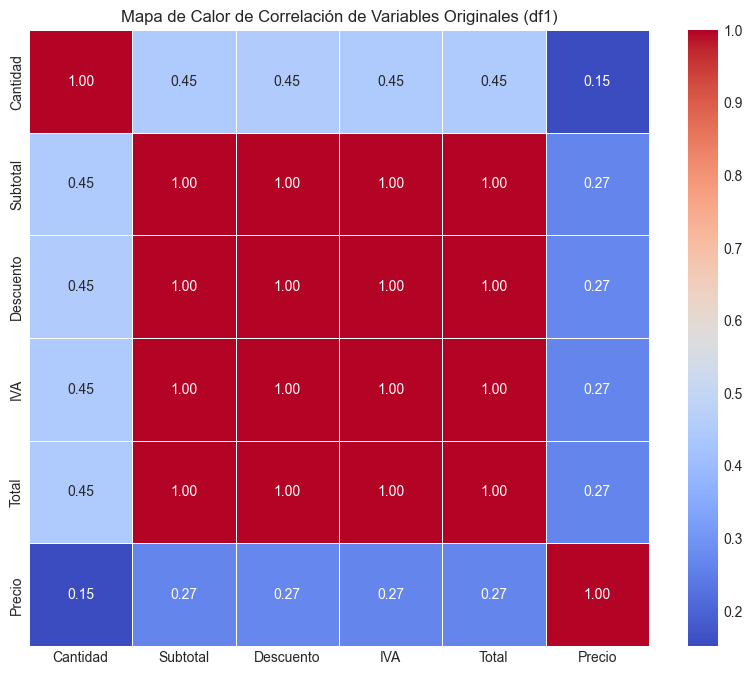

In [34]:
# Seleccionar las columnas numéricas relevantes para el mapa de calor
# Se excluyen las variables no numéricas o irrelevantes para este analisis.
numeric_cols = ['Cantidad', 'Subtotal', 'Descuento', 'IVA', 'Total', 'Precio']
correlation_df = df1[numeric_cols]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()
print(correlation_matrix)


# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Variables Originales (df1)')
plt.show()

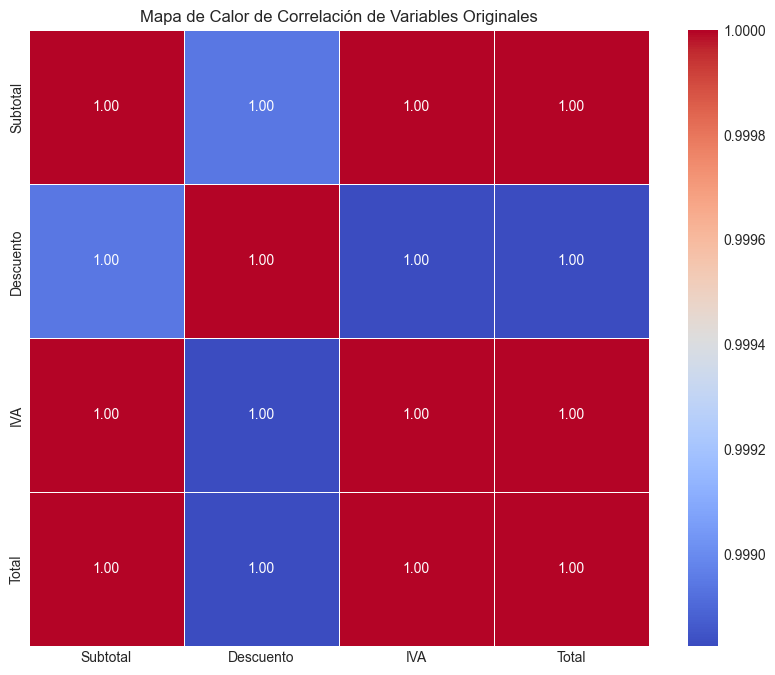

VIF de las variables originales:
    Variable           VIF
0   Subtotal  8.874088e+12
1  Descuento  2.205625e+10
2        IVA  8.013522e+12
3      Total  1.359628e+06


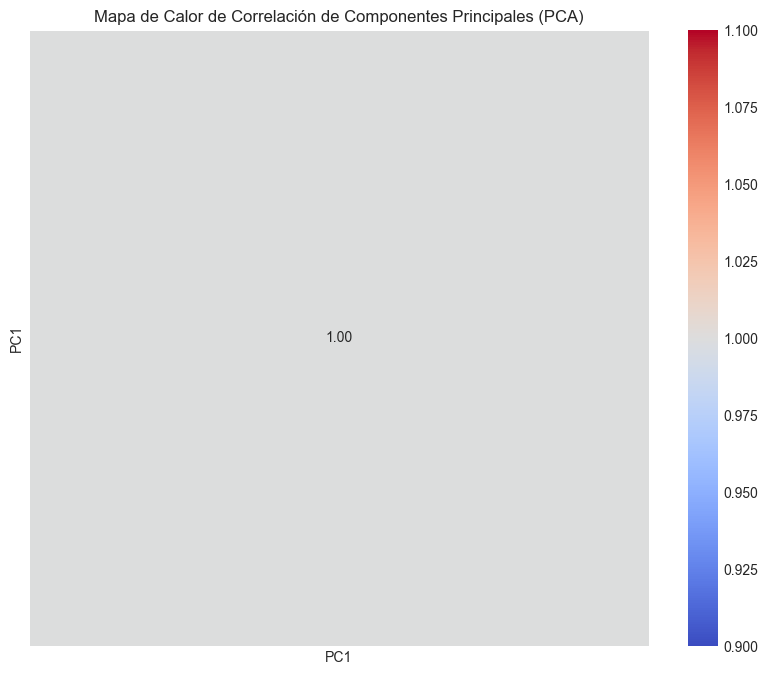

Varianza explicada por cada componente principal:
[0.99957305]
Proporción acumulada de varianza explicada:
[0.99957305]


In [39]:
# Preparación de los datos: Seleccionar columnas numéricas relevantes para PCA
numeric_cols = ['Subtotal', 'Descuento', 'IVA', 'Total']
X = df[numeric_cols]

# Eliminar filas con valores faltantes (si las hay)
X = X.dropna()

# Estandarizar los datos (necesario para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la matriz de correlación original
correlation_matrix = pd.DataFrame(X).corr()

# Visualizar la matriz de correlación original con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Variables Originales')
plt.show()

# Calcular el VIF para evaluar multicolinealidad
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF de las variables originales:")
print(vif_data)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=0.95)  # Conservar el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=X.index)

# Calcular la matriz de correlación de los componentes principales
correlation_matrix_pca = X_pca_df.corr()

# Visualizar la matriz de correlación de los componentes principales
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pca, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Componentes Principales (PCA)')
plt.show()

# Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Imprimir la proporción acumulada de varianza explicada
print("Proporción acumulada de varianza explicada:")
print(np.cumsum(pca.explained_variance_ratio_))

# Crear un nuevo DataFrame eliminando las columnas usadas en PCA
df_updated = df.drop(columns=numeric_cols)

# Concatenar los componentes principales al DataFrame actualizado
df_updated = pd.concat([df_updated, X_pca_df], axis=1)

### 4. Modelado (Modeling)

Esta fase se centró en construir y entrenar modelos de regresión lineal para predecir el valor total de las ventas. El proceso fue iterativo, comenzando con un modelo de línea de base y luego aplicando técnicas avanzadas para mejorar su rendimiento y robustez.



1. Modelo OLS (Ordinary Least Squares)


2. Modelo de Regresión Lasso (L1 Regularización)


3. Modelo de regresion Robusto


4. Modelo de Regresión RANSAC (RANdom SAmple Consensus)

### 5. Evaluación (Evaluation)

Objetivo: Evaluar el desempeño de los modelos y validar el dataset preparado.
Actividades Realizadas:

Métricas: Calcular R², MSE, RMSE con sklearn.metrics.
Validación Cruzada: cross_val_score() para robustez.
Comparación: Evaluar OLS vs. regresiones robustas (Ridge, Lasso, RANSAC) en presencia de outliers o multicolinealidad.
Iteración: Si el desempeño es bajo, regresar a fases previas (e.g., mejorar extracción regex).


Herramientas: sklearn.metrics, visualizaciones con matplotlib y seaborn.

### 6. Despliegue (Deployment)

Objetivo: Preparar para implementación futura, aunque en esta práctica académica sea conceptual.
Actividades Realizadas: Exportar dataset y modelos (e.g., joblib.dump(model, 'modelo.pkl')), documentar pipeline en un script reproducible.
Consideraciones: Posible integración en una app web para predicciones en tiempo real, pero limitada a la práctica.

Esta metodología CRISP-DM asegura un enfoque científico, iterativo y data-driven, adaptado a la extracción de datos de PDFs. Se documenta con código en Jupyter Notebooks para trazabilidad. En total, se procesaron [especifica, e.g., 50 PDFs], generando un dataset de [e.g., 200 filas]. Si necesitas código específico para alguna fase o ajustar a otro marco (e.g., SEMMA), avísame para refinarlo paso a paso antes de avanzar al siguiente apartado del reporte.